# Trabalho final Controle I

Diego Jun Sato Kurashima - 10274231  
Felipe Gomes de Melo - 10340624

## Modelo completo

![Figura 1](./Figuras/modelo_completo.png)

## Modelo mesa

![Figura 2](./Figuras/modelo_mesa.png)

## Modelo eixo

![Figura 3](./Figuras/modelo_eixo.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as co
%matplotlib inline

In [2]:
## Figura 2

M, C_l = sp.symbols("M C_l")
f_m, f_c = sp.symbols("f_{mesa} f_{corte}")
t = sp.Symbol("t")

x = sp.Symbol('x')
xp = sp.Symbol('\dot{x}')
xpp = sp.Symbol('\ddot{x}')

## Figura 3

J_f, C_th, k_eq = sp.symbols(r"J_f C_{\theta} k_{eq}")
p_f = sp.Symbol("p_f")

theta_f = sp.Symbol(r"\theta_f")
theta_fp = sp.Symbol(r"\dot{\theta_f}")
theta_fpp = sp.Symbol(r"\ddot{\theta_f}")

theta_m = sp.Symbol(r"\theta_m")
theta_mp = sp.Symbol(r"\dot{\theta_m}")
theta_mpp = sp.Symbol(r"\ddot{\theta_m}")

## Constantes de torção

k_th_a = sp.Symbol(r"k_{\theta a}")
k_th_f = sp.Symbol(r"k_{\theta f}")
k_th_f_0 = sp.Symbol(r"k_{\theta f 0}")
l_0 = sp.Symbol("l_0")

In [3]:
eq1 = sp.Eq(M*xpp+C_l*xp, f_m-f_c)
eq1

Eq(C_l*\dot{x} + M*\ddot{x}, -f_{corte} + f_{mesa})

In [4]:
eq2 = sp.Eq(J_f*theta_fpp + C_th*(theta_fp - theta_mp) + k_eq*(theta_f - theta_m), -f_m*p_f)
eq2

Eq(C_{\theta}*(\dot{\theta_f} - \dot{\theta_m}) + J_f*\ddot{\theta_f} + k_{eq}*(\theta_f - \theta_m), -f_{mesa}*p_f)

In [5]:
def1 = sp.Eq(1/k_eq, 1/k_th_a + 1/k_th_f)
def1

Eq(1/k_{eq}, 1/k_{\theta f} + 1/k_{\theta a})

In [6]:
def2 = sp.Eq(x, theta_f*p_f)
def2

Eq(x, \theta_f*p_f)

In [7]:
def3 = sp.Eq(k_th_f, k_th_f_0*(1.08 - x/l_0))
def3 = sp.Eq(k_th_f, k_th_f_0*(1.08 - 0.75/l_0))
def3

Eq(k_{\theta f}, k_{\theta f 0}*(1.08 - 0.75/l_0))

In [8]:
v_m = sp.Symbol("v_m")
i = sp.Symbol("i")
ip = sp.Symbol(r"\frac{d}{dt}i")

L, R, k_cem = sp.symbols("L R k_{cem}")

J_m, tau_m, k_m = sp.symbols(r"J_m \tau_m k_m")

In [9]:
eq3 = sp.Eq(v_m, L*ip + R*i + k_cem*theta_mp)
eq3

Eq(v_m, L*\frac{d}{dt}i + R*i + \dot{\theta_m}*k_{cem})

In [10]:
def4 = sp.Eq(tau_m, k_m*i)
def4

Eq(\tau_m, i*k_m)

In [11]:
eq4 = sp.Eq(J_m*theta_mpp, k_m*i - C_th*(theta_mp-theta_fp) - k_eq*(theta_m - theta_f))
eq4

Eq(J_m*\ddot{\theta_m}, -C_{\theta}*(-\dot{\theta_f} + \dot{\theta_m}) + i*k_m - k_{eq}*(-\theta_f + \theta_m))

In [12]:
v_s = sp.Symbol("v_s")
k_s = sp.Symbol("k_s")

eq5 = sp.Eq(v_s, k_s*x)
eq5

Eq(v_s, k_s*x)

In [13]:
parametros = [
    (M, 40),
    (C_l, 50),
    (p_f, 0.03),
    (l_0, 1.5),
    (J_f, 9.4e-4),
    (k_th_f_0, 1.2e4),
    (k_th_a, 42),
    (C_th, 0.3),
    (J_m, 2.3e-6),
    (k_m, 2),
    (k_cem, 0.5),
    (R, 9),
    (L, 0.006),
]

In [14]:
definicoes = [
    (def1, k_eq),
    (def3, k_th_f),
    (def4, tau_m)
]

In [15]:
sistema = [
    eq1,
    eq2,
    eq3,
    eq4,
]

In [16]:
def solve_and_subs(defs):
    retlist = [None]*len(defs)
    for i, definition in enumerate(defs):
        solution = sp.solveset(*definition)
        retval = None
        if solution.is_Complement:
            retval = solution.args[0].args[0]
        else:
            retval = solution.args[0]
        a = definition[1]
        retlist[i] = (definition[1], retval)

    return retlist

parametros2 = solve_and_subs(definicoes)

In [17]:
solution = sp.solveset(def2, theta_f).args[0]

theta_f_subs = [
    (theta_f, solution),
    (theta_fp, solution.subs(x, xp)),
    (theta_fpp, solution.subs(x, xpp)),
]

In [18]:
for eq in sistema:
    display(eq)

Eq(C_l*\dot{x} + M*\ddot{x}, -f_{corte} + f_{mesa})

Eq(C_{\theta}*(\dot{\theta_f} - \dot{\theta_m}) + J_f*\ddot{\theta_f} + k_{eq}*(\theta_f - \theta_m), -f_{mesa}*p_f)

Eq(v_m, L*\frac{d}{dt}i + R*i + \dot{\theta_m}*k_{cem})

Eq(J_m*\ddot{\theta_m}, -C_{\theta}*(-\dot{\theta_f} + \dot{\theta_m}) + i*k_m - k_{eq}*(-\theta_f + \theta_m))

In [19]:
f_m_sol = sp.solveset(sistema[0], f_m)
f_m_sol.args[0]

sym_sistema = [sistema[1].subs(f_m, f_m_sol.args[0]), sistema[2], sistema[3]]

In [20]:
for eq in sym_sistema:
    display(eq)

Eq(C_{\theta}*(\dot{\theta_f} - \dot{\theta_m}) + J_f*\ddot{\theta_f} + k_{eq}*(\theta_f - \theta_m), -p_f*(C_l*\dot{x} + M*\ddot{x} + f_{corte}))

Eq(v_m, L*\frac{d}{dt}i + R*i + \dot{\theta_m}*k_{cem})

Eq(J_m*\ddot{\theta_m}, -C_{\theta}*(-\dot{\theta_f} + \dot{\theta_m}) + i*k_m - k_{eq}*(-\theta_f + \theta_m))

In [21]:
def batch_subs(sist, subs_list):
    retsis = sist.copy()
    for subs_tuple in subs_list:
        for i, _ in enumerate(retsis):
            retsis[i] = retsis[i].subs(*subs_tuple)
    return retsis

In [22]:
sym_sistema2 = batch_subs(sym_sistema, theta_f_subs)

In [23]:
state_sol = sp.linsolve(sym_sistema2, [xpp, theta_mpp, ip])
for sol in state_sol.args[0]:
    display(sol)

(-C_l*\dot{x}*p_f**2 + C_{\theta}*\dot{\theta_m}*p_f - C_{\theta}*\dot{x} + \theta_m*k_{eq}*p_f - f_{corte}*p_f**2 - k_{eq}*x)/(J_f + M*p_f**2)

(-C_{\theta}*\dot{\theta_m}*p_f + C_{\theta}*\dot{x} - \theta_m*k_{eq}*p_f + i*k_m*p_f + k_{eq}*x)/(J_m*p_f)

(-R*i - \dot{\theta_m}*k_{cem} + v_m)/L

In [24]:
a, b = sp.linear_eq_to_matrix(state_sol.args[0], [x, xp, theta_m, theta_mp, i])

In [25]:
finala = sp.Matrix([ [0, 1, 0, 0, 0], a[0,:], [0, 0, 0, 1, 0], a[1,:], a[2,:]])
finala

Matrix([
[                       0,                                           1,                           0,                               0,       0],
[-k_{eq}/(J_f + M*p_f**2), (-C_l*p_f**2 - C_{\theta})/(J_f + M*p_f**2), k_{eq}*p_f/(J_f + M*p_f**2), C_{\theta}*p_f/(J_f + M*p_f**2),       0],
[                       0,                                           0,                           0,                               1,       0],
[        k_{eq}/(J_m*p_f),                        C_{\theta}/(J_m*p_f),                 -k_{eq}/J_m,                 -C_{\theta}/J_m, k_m/J_m],
[                       0,                                           0,                           0,                      -k_{cem}/L,    -R/L]])

In [26]:
from IPython.display import Markdown as md

left_side = r"\left[\begin{matrix} \dot{x} \\ \ddot{x} \\" + \
    r"\dot{\theta_p} \\ \ddot{\theta_p} \\ \frac{d}{dt}i \end{matrix} \right]"

right_side = r"\left[\begin{matrix} x \\ \dot{x} \\ \theta_p \\ \dot{\theta_p} \\ i \end{matrix} \right]"

md(f"$${left_side}={sp.latex(finala)} {right_side}$$")

$$\left[\begin{matrix} \dot{x} \\ \ddot{x} \\\dot{\theta_p} \\ \ddot{\theta_p} \\ \frac{d}{dt}i \end{matrix} \right]=\left[\begin{matrix}0 & 1 & 0 & 0 & 0\\- \frac{k_{eq}}{J_{f} + M p_{f}^{2}} & \frac{- C_{l} p_{f}^{2} - C_{\theta}}{J_{f} + M p_{f}^{2}} & \frac{k_{eq} p_{f}}{J_{f} + M p_{f}^{2}} & \frac{C_{\theta} p_{f}}{J_{f} + M p_{f}^{2}} & 0\\0 & 0 & 0 & 1 & 0\\\frac{k_{eq}}{J_{m} p_{f}} & \frac{C_{\theta}}{J_{m} p_{f}} & - \frac{k_{eq}}{J_{m}} & - \frac{C_{\theta}}{J_{m}} & \frac{k_{m}}{J_{m}}\\0 & 0 & 0 & - \frac{k_{cem}}{L} & - \frac{R}{L}\end{matrix}\right] \left[\begin{matrix} x \\ \dot{x} \\ \theta_p \\ \dot{\theta_p} \\ i \end{matrix} \right]$$

In [27]:
finalb = sp.Matrix([ [0, 0], [0, -b[0].subs(f_c, 1)], [0, 0], [0, 0], [-b[2].subs(v_m, 1), 0]])
u_vector = r"\left[\begin{matrix} v_m \\ f_{corte} \end{matrix}\right]"

md(f"$${sp.latex(finalb)} {u_vector}$$")

$$\left[\begin{matrix}0 & 0\\0 & - \frac{p_{f}^{2}}{J_{f} + M p_{f}^{2}}\\0 & 0\\0 & 0\\\frac{1}{L} & 0\end{matrix}\right] \left[\begin{matrix} v_m \\ f_{corte} \end{matrix}\right]$$

In [28]:
md(f"$${left_side}={sp.latex(finala)} {right_side} + {sp.latex(finalb)} {u_vector}$$")

$$\left[\begin{matrix} \dot{x} \\ \ddot{x} \\\dot{\theta_p} \\ \ddot{\theta_p} \\ \frac{d}{dt}i \end{matrix} \right]=\left[\begin{matrix}0 & 1 & 0 & 0 & 0\\- \frac{k_{eq}}{J_{f} + M p_{f}^{2}} & \frac{- C_{l} p_{f}^{2} - C_{\theta}}{J_{f} + M p_{f}^{2}} & \frac{k_{eq} p_{f}}{J_{f} + M p_{f}^{2}} & \frac{C_{\theta} p_{f}}{J_{f} + M p_{f}^{2}} & 0\\0 & 0 & 0 & 1 & 0\\\frac{k_{eq}}{J_{m} p_{f}} & \frac{C_{\theta}}{J_{m} p_{f}} & - \frac{k_{eq}}{J_{m}} & - \frac{C_{\theta}}{J_{m}} & \frac{k_{m}}{J_{m}}\\0 & 0 & 0 & - \frac{k_{cem}}{L} & - \frac{R}{L}\end{matrix}\right] \left[\begin{matrix} x \\ \dot{x} \\ \theta_p \\ \dot{\theta_p} \\ i \end{matrix} \right] + \left[\begin{matrix}0 & 0\\0 & - \frac{p_{f}^{2}}{J_{f} + M p_{f}^{2}}\\0 & 0\\0 & 0\\\frac{1}{L} & 0\end{matrix}\right] \left[\begin{matrix} v_m \\ f_{corte} \end{matrix}\right]$$

In [29]:
c = sp.Matrix([k_s, 0, 0, 0, 0]).transpose()

In [30]:
c

Matrix([[k_s, 0, 0, 0, 0]])

In [31]:
all_subs = [*theta_f_subs, *parametros2, *parametros]

numericA = batch_subs(finala, all_subs)
A = np.array(numericA).astype(np.float64)

numericB = batch_subs(finalb, all_subs)
B = np.array(numericB).astype(np.float64)

C = np.zeros((1,5))
C[0,0] = 10

D = np.zeros((1,2))

In [32]:
global_ss = co.ss(A, B, C, D)

In [33]:
np.set_printoptions(precision=2)
global_ss

A = [[ 0.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [-1.13e+03 -9.34e+00  3.39e+01  2.44e-01  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00]
 [ 6.05e+08  4.35e+06 -1.82e+07 -1.30e+05  8.70e+05]
 [ 0.00e+00  0.00e+00  0.00e+00 -8.33e+01 -1.50e+03]]

B = [[ 0.00e+00  0.00e+00]
 [ 0.00e+00 -2.44e-02]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 1.67e+02  0.00e+00]]

C = [[10.  0.  0.  0.  0.]]

D = [[0. 0.]]

In [34]:
global_sys = co.ss2tf(global_ss)

In [35]:
global_sys.dcgain()

array([ 1.55e+08, -2.09e+07])

In [36]:
global_sys


Input 1 to output 1:
        1.389e-26 s^3 + 4.312e-11 s^2 + 3.531e+08 s + 4.914e+10
-----------------------------------------------------------------------
s^5 + 1.319e+05 s^4 + 2.864e+08 s^3 + 2.817e+10 s^2 + 1.151e+11 s + 318

Input 2 to output 1:
         -0.2436 s^3 - 3.214e+04 s^2 - 6.975e+07 s - 6.634e+09
-----------------------------------------------------------------------
s^5 + 1.319e+05 s^4 + 2.864e+08 s^3 + 2.817e+10 s^2 + 1.151e+11 s + 318

Utilizando a convenção

$$
V_s(s) = G(s)V_m(s) + G_d(s)F_{corte}(s)
$$

In [37]:
num_G = global_sys.num[0][0]
num_Gd = global_sys.num[0][1]

den_G = global_sys.den[0][0]
den_Gd = global_sys.den[0][1]

In [38]:
G = co.tf(num_G, den_G)
Gd = co.tf(num_Gd, den_Gd)

display(G)
display(Gd)


        1.389e-26 s^3 + 4.312e-11 s^2 + 3.531e+08 s + 4.914e+10
-----------------------------------------------------------------------
s^5 + 1.319e+05 s^4 + 2.864e+08 s^3 + 2.817e+10 s^2 + 1.151e+11 s + 318


         -0.2436 s^3 - 3.214e+04 s^2 - 6.975e+07 s - 6.634e+09
-----------------------------------------------------------------------
s^5 + 1.319e+05 s^4 + 2.864e+08 s^3 + 2.817e+10 s^2 + 1.151e+11 s + 318

In [39]:
p = G.pole()
p[-1] = 0.0
for pol in p:
    print(pol)

-129737.95017964908
-2103.1502259720837
-98.75139390465245
-4.270278585592402
0.0


/home/felipe/.local/lib/python3.8/site-packages/scipy/signal/filter_design.py:1621: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [40]:
limiar = 1e3
eff_p = [a for a in p if np.abs(a) < limiar]
for pol in eff_p:
    print(pol)

-98.75139390465245
-4.270278585592402
0.0


In [41]:
z = G.zero()
for zer in z:
    print(zer)

(-1552670012325121+1.59457847660113e+17j)
(-1552670012325121-1.59457847660113e+17j)
(-139.16023993629292+0j)


In [42]:
eff_z = [a for a in z if np.abs(a) < limiar]
for zer in eff_z:
    print(zer)

(-139.16023993629292+0j)


In [43]:
zd = Gd.zero()
for zer in zd:
    print(zer)

-129729.7572626705
-2105.3383908361534
-99.68695519768346


In [44]:
eff_zd = [a for a in zd if np.abs(a) < limiar]
for zer in eff_zd:
    print(zer)

-99.68695519768346


In [45]:
nG_zpk = co.zpk2tf(eff_z, eff_p, 1)
nG = co.tf(*nG_zpk)
nG


       s + 139.2
-----------------------
s^3 + 103 s^2 + 421.7 s

In [46]:
nGd_zpk = co.zpk2tf(eff_zd, eff_p, -1)
nGd = co.tf(*nGd_zpk)
nGd


      -s - 99.69
-----------------------
s^3 + 103 s^2 + 421.7 s

In [47]:
nGd.dcgain()

array(inf)

(array([-98.75,  -4.27,   0.  ]), array([-139.16]))

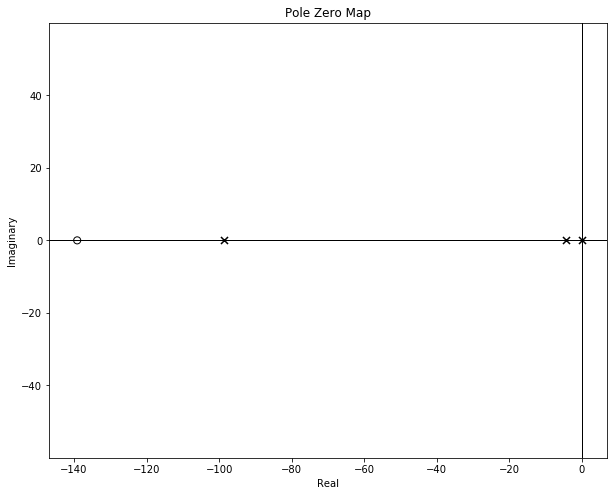

In [48]:
plt.rcParams["figure.figsize"] = (10,8)
co.pzmap(nG)

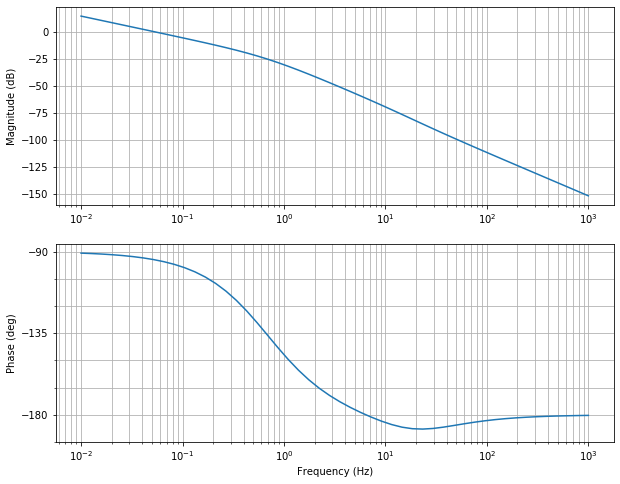

In [49]:
retval = co.bode(nG)

(array([-98.75,  -4.27,   0.  ]), array([-99.69]))

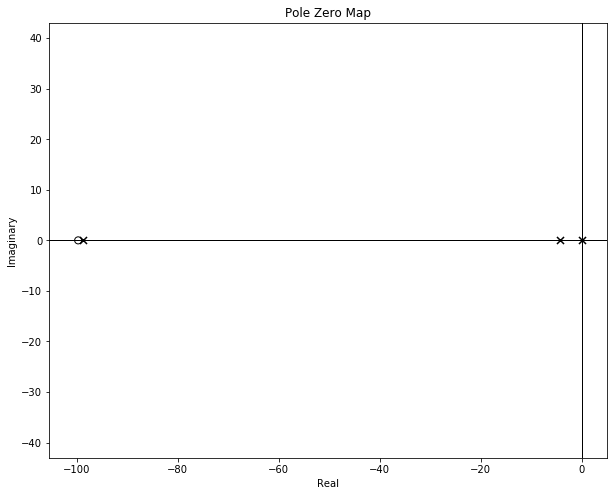

In [50]:
plt.rcParams["figure.figsize"] = (10,8)
co.pzmap(nGd)

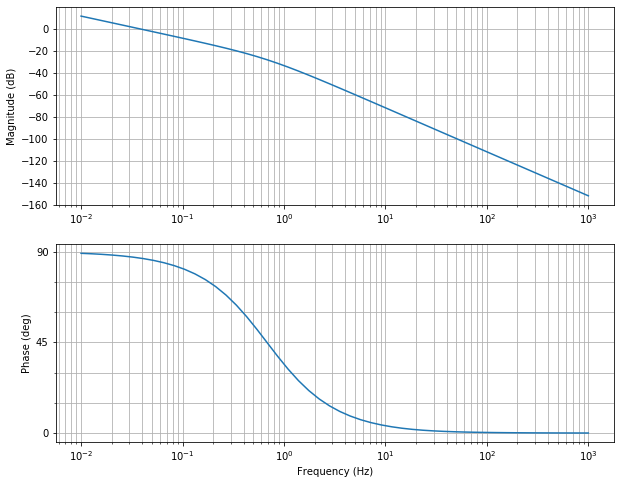

In [51]:
retval = co.bode(nGd)

## Requisitos

- Erro em regime nulo
- Sobressinal $M_p < 5\%$
- Tempo assentamento 2% $t_s < 0.5s $
- Margem de ganho maior de $10 ~ dB$
- Margem de fase maior que $ ~ 45°$
- Rejeição completa de perturbações constantes (entrada degrau em $f_{corte}$)
- Esforço de trabalho limitado

{'RiseTime': 6.11677901810934,
 'SettlingTime': 10.990783886507575,
 'SettlingMin': 0.8995782994540726,
 'SettlingMax': 0.9989942085730168,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9989942085730168,
 'PeakTime': 19.398927743146764,
 'SteadyStateValue': 0.9989942085730168}

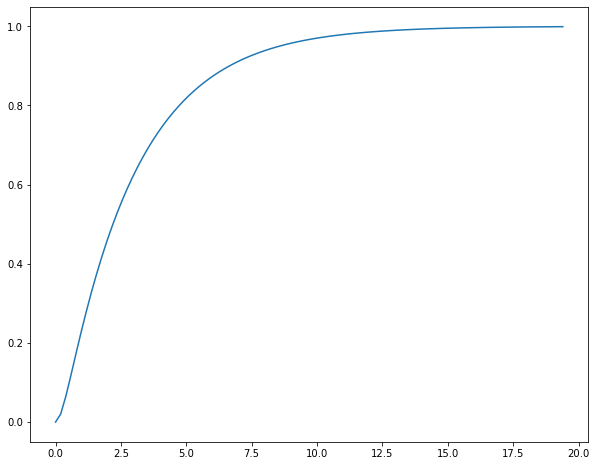

In [52]:
plt.rcParams["figure.figsize"] = (10,8)
y, t = co.step(co.feedback(nG))
plt.plot(t, y)
co.stepinfo(co.feedback(nG))

{'RiseTime': 0.0,
 'SettlingTime': 19.36009105096842,
 'SettlingMin': 0.001005791426984315,
 'SettlingMax': 1.0,
 'Overshoot': -100.0,
 'Undershoot': 0.001005791426984315,
 'Peak': 1.0,
 'PeakTime': 0.0,
 'SteadyStateValue': 0.001005791426984315}

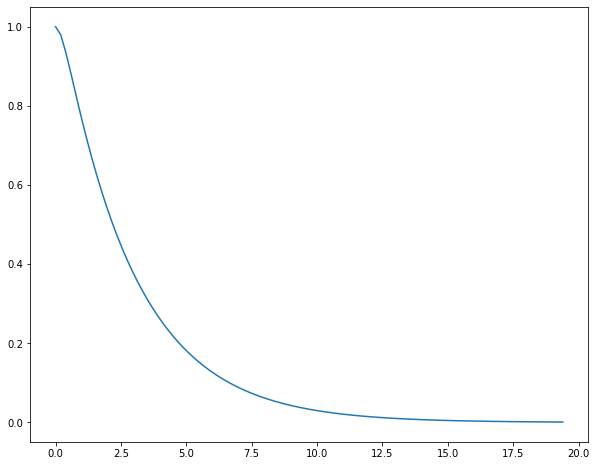

In [53]:
plt.rcParams["figure.figsize"] = (10,8)
y, t = co.step(co.feedback(1, nG))
plt.plot(t, y)
co.stepinfo(co.feedback(1, nG))

In [54]:
print(f"Zeros: {nG.zero()} Polos: {nG.pole()} Ganho: {nG.dcgain()}")

Zeros: [-139.16] Polos: [-98.75  -4.27   0.  ] Ganho: inf


Iremos utilizar um controlador PI na forma

$$
H(s) =  K_p+K_i\frac{1}{s}+K_d\frac{N}{\frac{1}{s}N+1}
$$

(array([-98.75, -15.15,  -4.27,   0.  ]), array([-139.16,   -4.61]))

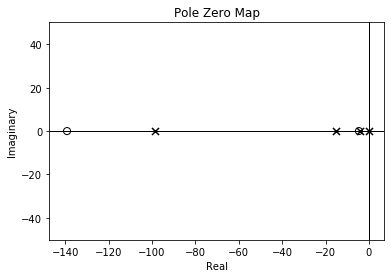

In [55]:
plt.rcParams["figure.figsize"] = (10,8)

# As constantes foram obtidas com a função pidTuner do Matlab
Kp = 15.23 #197.8
Ki = 324.56
Kd = 2.3 #29.5
N = 1/0.066 #0.00021767

s = co.tf("s")
H = Kp + Kd*N/(N/s + 1) #+ Ki/s

%matplotlib inline
co.pzmap(H*nG)

{'RiseTime': 0.3145242503214909,
 'SettlingTime': 0.4824375951146374,
 'SettlingMin': 0.9015728174783871,
 'SettlingMax': 1.0177747694910257,
 'Overshoot': 1.6291180680267519,
 'Undershoot': 0.0,
 'Peak': 1.0177747694910257,
 'PeakTime': 0.6904496491121174,
 'SteadyStateValue': 1.0014598068338694}

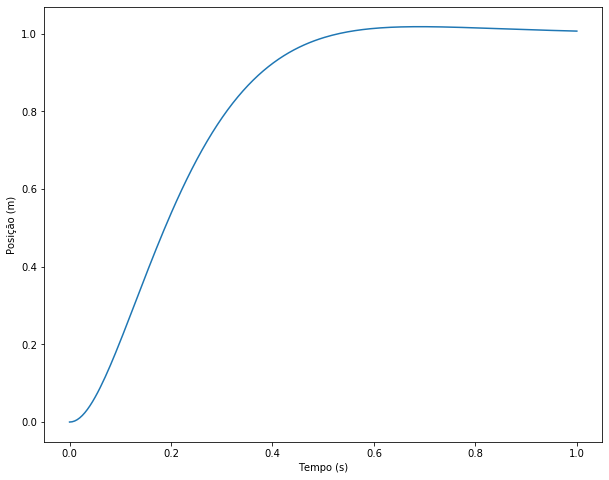

In [56]:
plt.rcParams["figure.figsize"] = (10,8)
cloop = co.feedback(H*nG)
y, t = co.step(cloop, np.linspace(0,1,200))
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.plot(t, y)
co.stepinfo(cloop)

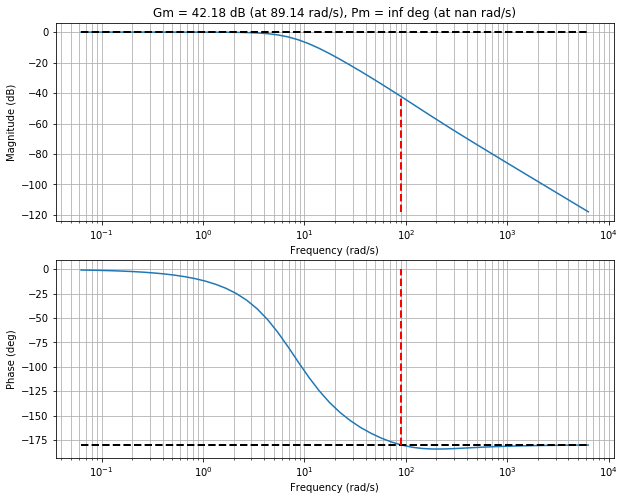

In [57]:
omega = np.logspace(0,2,num=100,base=10)
mag,phase,omega = co.bode(cloop,dB=True,Plot=False)
# Converte para dB e graus
magdB = 20*np.log10(mag)
phase_deg = phase*180.0/np.pi

Gm,Pm,Wcg,Wcp = co.margin(cloop)
GmdB = 20*np.log10(Gm)

f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')
ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
###Plot the zero dB line
ax1.plot(omega,0*omega,'k--',lineWidth=2)
###Plot the -180 deg lin
ax2.plot(omega,-180+0*omega,'k--',lineWidth=2)
##Plot the vertical line from -180 to 0 at Wcg
ax2.plot([Wcg,Wcg],[-180,0],'r--',lineWidth=2)
##Plot the vertical line from -180+Pm to 0 at Wcp
ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',lineWidth=2)
##Plot the vertical line from min(magdB) to 0db at Wcp
ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',lineWidth=2)


5.564276094276094

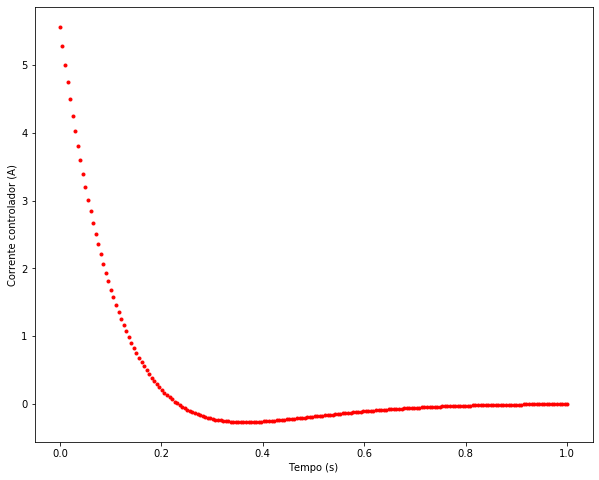

In [58]:
plt.rcParams["figure.figsize"] = (10,8)
effort = co.feedback(H, nG)*(1/9)
y, t = co.step(effort, np.linspace(0, 1, 200))
plt.plot(t, y, '.r')
plt.xlabel("Tempo (s)")
plt.ylabel("Corrente controlador (A)")
np.max(np.abs(y))

Pudemos perceber que o uso do termo integrador do PID leva o sistema a consumir mais corrente do que o admissível pelo motor especificado, de modo que optamos pelo uso de um controlador PD com filtro